In [1]:
''' Import Libraries '''

import os
from tensorflow.keras.models import load_model
import numpy as np


In [60]:
''' Load Model '''

curr_path = os.getcwd()
# model = load_model('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\Trained models\\Twenty-three-classification\\12 leads.h5')
model = load_model('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\finetuned_ecg_model2.h5')

For original, will bring in data from other.

In [12]:
''' Load Data '''
path = 'data path'

calssificatin_type = {"binary":1,"superclasses":5,"subclasses":23, 'custom':7}
classification_name="custom"  # Change this to "binary", "superclasses", "subclasses", or "custom" as needed
no_of_classes=calssificatin_type[classification_name]

lead_type={"lead-I":1, "bipolar-limb":3 , "unipolar-limb":3, "limb-leads":6 , "precordial-leads":6,"all-lead":12}
lead_name= "all-lead"
no_of_leads=lead_type[lead_name]

# x_test  = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\x_test.npy',allow_pickle=True)
# # y_test  = np.load(path + 'y_test_sub.npy',allow_pickle=True)

# # unpickle the y_test and y_train
# import pickle
# with open('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\y_test.pkl', 'rb') as f:
#     y_test = pickle.load(f)
# with open('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\y_train.pkl', 'rb') as f:
#     y_train = pickle.load(f)

# load the test data from the npz files
test_data = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\test_data.npz')
print(test_data.files)
# Extract the arrays
X_test = test_data["X"]
y_test = test_data["y"]

x_test = np.transpose(X_test, (0, 2, 1))[..., np.newaxis]
# x_test  = x_test.transpose(0, 2, 1)

# x_test  = x_test.reshape(2203, no_of_leads, 1000, 1)

# convert y_test to dataframe
import pandas as pd
# y_test = pd.Series(y_test)

print("x_test  :", x_test.shape)
print("y_test  :", y_test.shape)
print('Data loaded')
y_test_series = y_test
print(y_test)
from sklearn.preprocessing import MultiLabelBinarizer

# if classification_name!="binary":
#     print("binary classification")
#     mlb = MultiLabelBinarizer()
#     mlb.fit(y_train)
#     y_train = mlb.transform(y_train)

#     mlb = MultiLabelBinarizer()
#     mlb.fit(y_test)
#     y_test = mlb.transform(y_test)
#     print('Data proocessed')



['X', 'y', 'label_names']
x_test  : (4368, 12, 1000, 1)
y_test  : (4368,)
Data loaded
[4 4 4 ... 4 0 6]


In [111]:
# Load the balanced dataset
X_train = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\X_train_balanced.npz')
X_test = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\Task 3\\ECG-classification-main\\X_test_balanced.npz')
y_train = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\y_train_balanced.npz') 
y_test = np.load('C:\\Users\\mstew\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\y_test_balanced.npz')

print(y_train.files)
# Convert to numpy arrays
X_train = X_train['X'] if isinstance(X_train, np.lib.npyio.NpzFile) else X_train
X_test = X_test['X'] if isinstance(X_test, np.lib.npyio.NpzFile) else X_test
y_train = y_train['y'] if isinstance(y_train, np.lib.npyio.NpzFile) else y_train
y_test = y_test['y'] if isinstance(y_test, np.lib.npyio.NpzFile) else y_test


# # Normalization
# X_train = X_train / np.max(np.abs(X_train), axis=(1, 2), keepdims=True)
# X_test = X_test / np.max(np.abs(X_test), axis=(1, 2), keepdims=True)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# # Reshape to match model input
# X_train = np.transpose(X_train, (0, 2, 1))[..., np.newaxis]
# X_test = np.transpose(X_test, (0, 2, 1))[..., np.newaxis]

# Reshape to match model input
# X_test  = X_test.reshape(X_train.shape[0], 12, 1000, 1)
# X_train = X_train.reshape(X_train.shape[0], 12, 1000, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Encode labels to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

['y']
X_train shape: (24156, 12, 1000), y_train shape: (24156,)
X_test shape: (5540, 12, 1000), y_test shape: (5540,)
X_train shape: (24156, 12, 1000, 1), y_train shape: (24156,)
X_test shape: (5540, 12, 1000, 1), y_test shape: (5540,)


In [62]:
labels = test_data['label_names']
print("Labels:", labels)

Labels: ['1dAVb' 'AFIB' 'AFLT' 'LBBB' 'NORM' 'OTHER' 'RBBB']


In [63]:
y_test_df = pd.DataFrame(y_test)
print(y_test_df.head())
labels = y_test_df[0].unique()
print("Unique labels in y_test:", labels)

       0
0   AFLT
1  OTHER
2   RBBB
3   NORM
4   NORM
Unique labels in y_test: ['AFLT' 'OTHER' 'RBBB' 'NORM' 'LBBB' '1dAVb' 'AFIB']


The labels we are interested in:
CLBBB - Complete Left Bundle Branch Block
CRBBB - Complete Right Bundle Branch Block
NORM - Normal
_AVB - Unspecified Atrioventricular Block (we are looking for 1st degree)
STTC - ST-T Changes

In [ ]:
"""Evaluate the model"""

from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score, accuracy_score, auc, confusion_matrix


def sklearn_metrics(y_true, y_pred):
    y_bin = np.copy(y_pred)
    y_bin[y_bin >= 0.5] = 1
    y_bin[y_bin < 0.5]  = 0

    # Compute area under precision-Recall curve
    auc_sum = 0
    for i in range(no_of_classes):
      precision, recall, thresholds = precision_recall_curve(y_true[:, i], y_pred[:,i])
      auc_sum += auc(recall, precision)

    print("Accuracy        : {:.2f}".format(accuracy_score(y_true.flatten(), y_bin.flatten())* 100))
    print("Macro AUC score : {:.2f}".format(roc_auc_score(y_true, y_pred, average='macro') * 100))
    print('AUPRC           : {:.2f}'.format((auc_sum / 5) * 100))
    print("Micro F1 score  : {:.2f}".format(f1_score(y_true, y_bin, average='micro') * 100))
    cm = confusion_matrix(y_true.flatten(), y_bin.flatten())
    print("Confusion matrix:\n", cm)


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_test = model.predict(X_test)
print("\nTest")
print(y_pred_test.shape)
print(y_test_encoded.shape)
print(y_pred_test)
# Convert to predicted class labels
y_pred_classes = np.argmax(y_pred_test, axis=1)

# Convert one-hot y_test to class labels if necessary
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true_classes = np.argmax(y_test_encoded, axis=1)
else:
    y_true_classes = y_test_encoded
# Print shape check
print("\nShapes:")
print("y_pred_classes:", y_pred_classes.shape)
print("y_true_classes:", y_true_classes.shape)

# Evaluate with sklearn
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

print("\nAccuracy:", accuracy_score(y_true_classes, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

174/174 [==============================] - 2s 14ms/step

Test
(5540, 7)
(5540,)
[[8.4817511e-01 3.6060155e-05 1.0967904e-02 ... 3.7163876e-03
  1.3602193e-01 8.8507913e-05]
 [9.6700307e-07 5.1379798e-06 2.3372465e-12 ... 7.1710171e-03
  9.9282151e-01 1.0577107e-06]
 [2.1816436e-06 1.9176459e-05 3.4824482e-10 ... 9.0656525e-01
  9.2899248e-02 5.1368057e-04]
 ...
 [2.8131983e-09 2.3627111e-08 9.9999821e-01 ... 1.9210189e-10
  5.6814139e-07 1.2487750e-06]
 [8.4826261e-01 3.6045960e-05 1.0950749e-02 ... 3.7134795e-03
  1.3595510e-01 8.8411674e-05]
 [1.1415203e-08 4.6136044e-08 1.2420585e-13 ... 9.9811625e-01
  1.8832459e-03 4.5617617e-07]]

Shapes:
y_pred_classes: (5540,)
y_true_classes: (5540,)

Classification Report:
              precision    recall  f1-score   support

       1dAVb       0.51      0.62      0.56       400
        AFIB       0.80      0.55      0.65       400
        AFLT       0.97      0.77      0.86       400
        LBBB       0.89      0.74      0.81       400
    

In [68]:
print(y_true_classes[10:25])
print(y_test[10:25])

[5 4 3 6 0 2 4 4 5 4 2 4 3 6 4]
['OTHER' 'NORM' 'LBBB' 'RBBB' '1dAVb' 'AFLT' 'NORM' 'NORM' 'OTHER' 'NORM'
 'AFLT' 'NORM' 'LBBB' 'RBBB' 'NORM']


In [53]:
def print_prediction_class(y_pred, class_names):
    # Convert the predictions to binary (0 or 1)
    y_pred_bin = np.copy(y_pred)

    confidence = y_pred_bin.max(axis=1, keepdims=True)
    print(confidence.shape)
    print(y_pred_bin[0])

    y_pred_bin[y_pred_bin >= 0.5] = 1
    y_pred_bin[y_pred_bin < 0.5]  = 0

    # Get the predicted classes
    predicted_classes = []
    for i in range(y_pred_bin.shape[0]):
        predicted_classes.append([class_names[j] for j in range(len(class_names)) if y_pred_bin[i][j] == 1])

    return predicted_classes, confidence


In [159]:
# benchmark the model on the mit_bih dataset
data = np.load('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ECG-classification-main\\ecg_arrhythmia_data.npz', allow_pickle=True)
print(data.files)
X_mit_bih = data['X']
y_mit_bih = data['y']
from sklearn.preprocessing import LabelEncoder
label_map = data['label_map']

print(label_map)
# label_map = {k: v for k, v in label_map.item().items()}  # Convert to a regular dictionary
# labels = list(label_map.keys())
# print(labels)
labels = label_map

print("X_mit_bih shape:", X_mit_bih.shape)
print("y_mit_bih shape:", y_mit_bih.shape)
print(y_mit_bih[:10])  # Print first 10 labels for verification


y_pred_mit_bih = model.predict(X_mit_bih)
print(y_pred_mit_bih[:10])  # Print first 10 predictions for verification

# Convert to predicted class labels
y_pred_mit_bih_classes = np.argmax(y_pred_mit_bih, axis=1)
# Evaluate with sklearn
print("\nClassification Report:")
print(classification_report(y_mit_bih, y_pred_mit_bih_classes, target_names=labels))


['X', 'y', 'label_map']
['1dAVb' 'AFIB' 'AFLT' 'LBBB' 'NORM' 'OTHER' 'RBBB']
X_mit_bih shape: (3499, 12, 1000, 1)
y_mit_bih shape: (3499,)
[6 5 2 1 4 5 5 0 5 1]
110/110 [==============================] - 2s 16ms/step
[[1.4693451e-03 2.3987533e-01 7.2746119e-04 4.2952681e-03 8.3873165e-04
  6.5030299e-02 6.8776357e-01]
 [5.0575429e-05 2.1358857e-04 1.0018860e-05 7.6455417e-06 3.8940334e-01
  6.1017263e-01 1.4220706e-04]
 [1.7985819e-08 1.9649621e-02 2.6743060e-06 1.3489223e-07 8.3607301e-07
  9.8034668e-01 1.7843187e-09]
 [2.0331237e-04 9.9174750e-01 1.1904526e-05 3.7893258e-06 1.3508463e-04
  7.1750609e-03 7.2326214e-04]
 [1.5399875e-06 1.3822069e-05 5.4102664e-08 5.1666711e-07 9.8917693e-01
  1.0806911e-02 2.4574445e-07]
 [5.2171122e-06 7.1975492e-06 9.2692369e-09 1.4429789e-06 9.9977511e-01
  1.8271936e-04 2.8329336e-05]
 [5.5740060e-07 3.8386565e-07 6.2475812e-07 9.1771554e-08 6.7676085e-01
  3.2323718e-01 2.2677662e-07]
 [8.6036652e-01 7.5083728e-05 9.9204753e-06 3.2039421e-05 1.26

In [54]:
data1 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation01\\validation01.npy")
data2 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation02\\validation02.npy")
data3 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation03\\validation03.npy")
data4 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation04\\validation04.npy")
data5 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation05\\validation05.npy")
data6 = np.load("C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation06\\validation06.npy")
data = np.concatenate((data1, data2, data3, data4, data5, data6), axis=0)

print(data.shape) 

data_reshape  = data.reshape(6, no_of_leads, 1000, 1)



(72, 1000)


In [55]:
y_val = model.predict(data_reshape)

1/1 [==============================] - 0s 15ms/step


In [56]:
print(y_val.shape)
print(y_val)

(6, 7)
[[2.12846629e-08 2.60408850e-08 9.67878460e-14 1.31748157e-09
  9.94370401e-01 5.62730804e-03 2.19606454e-06]
 [4.34404512e-10 6.10590120e-11 1.00000000e+00 1.11567855e-15
  3.22916860e-10 2.88874240e-08 5.45337331e-10]
 [1.39342723e-02 4.68487531e-04 5.53208679e-07 2.61763402e-04
  6.38924360e-01 3.46330553e-01 7.99582849e-05]
 [3.11817421e-05 8.41607749e-01 7.39659345e-06 9.15928831e-06
  3.67466081e-03 1.54588029e-01 8.18307090e-05]
 [1.18567608e-04 3.33251432e-04 7.04804334e-05 1.47525006e-08
  7.28337618e-05 1.15777552e-02 9.87827122e-01]
 [5.91486655e-02 1.23773534e-02 5.19696259e-05 9.01488960e-01
  5.15835651e-04 2.60949526e-02 3.22225620e-04]]


In [69]:
class_names = label_encoder.classes_.tolist()
predicted_classes, confidence = print_prediction_class(y_val, class_names)

print(predicted_classes)
print("Confidence scores:", confidence)

(6, 1)
[2.1284663e-08 2.6040885e-08 9.6787846e-14 1.3174816e-09 9.9437040e-01
 5.6273080e-03 2.1960645e-06]
[['NORM'], ['AFLT'], ['NORM'], ['AFIB'], ['RBBB'], ['LBBB']]
Confidence scores: [[0.9943704 ]
 [1.        ]
 [0.63892436]
 [0.84160775]
 [0.9878271 ]
 [0.90148896]]


Below is only to check how many are flagged as AFIB and AFLT in the original dataset

In [24]:
import ast
import pandas as pd

# Load your PTB-XL metadata
df = pd.read_csv('C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1\\ptbxl_database.csv')

# Find all rows with AFIB or AFLT in the scp_codes
df['scp_codes'] = df['scp_codes'].apply(ast.literal_eval)
df['is_afib'] = df['scp_codes'].apply(lambda x: 'AFIB' in x)
df['is_aflt'] = df['scp_codes'].apply(lambda x: 'AFLT' in x)

# Filter for AFIB or AFLT
afib_df = df[df['is_afib']]
aflt_df = df[df['is_aflt']]

afib_df.head()


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,is_afib,is_aflt
16,17,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-20 14:25:25,...,", alles,",NaN,NaN,NaN,NaN,9,records100/00000/00017_lr,records500/00000/00017_hr,True,True
151,152,9796.0,70.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-01 11:06:12,...,", I-V1,",NaN,NaN,NaN,NaN,9,records100/00000/00152_lr,records500/00000/00152_hr,True,False
281,282,437.0,91.0,0,175.0,NaN,3.0,1.0,AT-6 C 5.5,1986-09-10 11:31:08,...,NaN,NaN,NaN,1ES,NaN,5,records100/00000/00282_lr,records500/00000/00282_hr,True,False
306,307,6348.0,63.0,0,174.0,64.0,3.0,1.0,AT-6 C 5.5,1986-09-13 10:15:34,...,NaN,NaN,NaN,NaN,NaN,1,records100/00000/00307_lr,records500/00000/00307_hr,True,False
317,318,2034.0,56.0,0,163.0,94.0,11.0,1.0,AT-6 C 5.5,1986-09-14 11:41:19,...,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00318_lr,records500/00000/00318_hr,True,False


In [71]:
import neurokit2 as nk
import ecg_plot
from matplotlib.ticker import AutoMinorLocator, FuncFormatter
import matplotlib.pyplot as plt

# Some helper functions for plotting ECG data taken from Blackboard.
def plot_combined_ecg(ecg, sample_rate, title):
    """
    Plot a combined 12-lead ECG layout from a PTB-XL ECG sample.
    This function reorders the ECG segments to match a 4-row print format and overlays lead labels.

    Parameters:
    - ecg: numpy array (n_samples x 12), ECG signal
    - fields: metadata dictionary from wfdb.rdsamp  ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    - lead_names: list of original lead names
    - sample_rate: sampling rate of the ECG signal (e.g., 100 or 500 Hz)
    """

    # Get the total number of samples
    n = ecg.shape[0]

    # Quarter marks to split ECG signal into 4 equal time segments
    q1, q2, q3 = n // 4, n // 2, 3 * n // 4

    # Create new leads for each row of the standard layout
    # First row: Lead I, aVR, V1, V4
    lead_I_new = np.concatenate([ecg[0:q1, 0], ecg[q1:q2, 3], ecg[q2:q3, 6], ecg[q3:n, 9]])

    # Second row: Lead II, aVL, V2, V5
    lead_II_new = np.concatenate([ecg[0:q1, 1], ecg[q1:q2, 4], ecg[q2:q3, 7], ecg[q3:n, 10]])

    # Third row: Lead III, aVF, V3, V6
    lead_III_new = np.concatenate([ecg[0:q1, 2], ecg[q1:q2, 5], ecg[q2:q3, 8], ecg[q3:n, 11]])

    # Bottom row (reference): Full Lead II
    lead_IV_new = ecg[:, 1]

    # Stack the 4 new rows (each as a separate lead)
    ecg_new = np.stack([lead_I_new, lead_II_new, lead_III_new, lead_IV_new], axis=1).transpose()

    # Define new lead labels
    lead_names_new = ['I', 'II', 'III', 'II Ref']

    # Plot ECG using ecg_plot library
    ecg_plot.plot(ecg_new, sample_rate=sample_rate, title=title, columns=1, lead_index=lead_names_new)

    # Grab axis from current figure
    ax = plt.gca()

    # Hide tick labels on vertical axis (but keep the ticks)
    ax.set_yticklabels([])

    # Format x-axis labels: only show ticks at integer seconds
    xlabels = ax.get_xticks()
    new_labels = [f"{int(x)}s" if x % 1 == 0 and x <= 10 else "" for x in xlabels]
    ax.set_xticklabels(new_labels)

    # Add annotations for the original leads contributing to each row
    ax.text(2.5, -0.75, 'aVR', fontsize=8, color='black')
    ax.text(2.5, -3.5, 'aVL', fontsize=8, color='black')
    ax.text(2.5, -6.5, 'aVF', fontsize=8, color='black')

    ax.text(5, -0.75, 'V1', fontsize=8, color='black')
    ax.text(5, -3.5, 'V2', fontsize=8, color='black')
    ax.text(5, -6.5, 'V3', fontsize=8, color='black')

    ax.text(7.5, -0.75, 'V4', fontsize=8, color='black')
    ax.text(7.5, -3.5, 'V5', fontsize=8, color='black')
    ax.text(7.5, -6.5, 'V6', fontsize=8, color='black')

    # Add display information for ECG scale and sampling
    ax.text(0.1, -10.4, f'{sample_rate} Hz   25.0 mm/s   10.0mm/mV', fontsize=10, color='black')

    # Display the plot
    ecg_plot.show()

def plot_ecg_with_grid(time, signal, title, sampling_rate, show_grid=True, style='color'):
    """Plots ECG signal with a grid resembling ECG paper."""
    fig, ax = plt.subplots(figsize=(12, 4))  # Adjust figure height as needed
    if (style == 'bw'):
        color_major = (0.4, 0.4, 0.4)
        color_minor = (0.75, 0.75, 0.75)
        color_line  = (0, 0, 0)
    else:
        color_major = (1, 0, 0)
        color_minor = (1, 0.7, 0.7)
        color_line  = (0, 0, 0.7)

    ax.plot(time, signal, color=color_line)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (mV)')

    if(show_grid):
        scale_ms_per_div = 0.2  # Corresponds to 5 small squares at 25 mm/s
        scale_mV_per_div = 0.5  # Corresponds to 5 small squares at 10 mm/mV

        x_min, x_max = np.min(time), np.max(time)
        y_min, y_max = np.min(signal), np.max(signal)

        ax.set_xticks(np.arange(x_min, x_max, scale_ms_per_div))
        ax.set_yticks(np.arange(y_min, y_max, scale_mV_per_div))

        ax.minorticks_on()
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))

        # Format x-axis labels to show only integers
        def format_x_ticks(val, pos):
            if np.isclose(val, np.round(val)):
                return f'{int(round(val))}'
            else:
                return ''

        ax.xaxis.set_major_formatter(FuncFormatter(format_x_ticks))

        display_factor = 1  # Adjust if needed for line widths

        ax.grid(which='major', linestyle='-', linewidth=0.5 * display_factor, color=color_major, alpha=0.5)
        ax.grid(which='minor', linestyle='-', linewidth=0.25 * display_factor, color=color_minor, alpha=0.5)

    ax.set_ylim(y_min - 0.2 * (y_max - y_min), y_max + 0.2 * (y_max - y_min)) # Add some padding
    ax.set_xlim(x_min, x_max)
    # plt.show()

def load_numpy_binary_and_plot_separate(input_filename="ecg_data.npy", sampling_rate=100, lead_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]):
    """
    Loads an ECG sample from a binary .npy file and plots each of the 12 leads
    as a separate figure using plot_ecg_with_grid.

    Args:
        input_filename (str): The name of the input .npy file.
        sampling_rate (int): The sampling rate of the ECG data.
    """
    try:
        loaded_ecg_data = np.load(input_filename)
        num_leads, num_samples = loaded_ecg_data.shape
        time = np.linspace(0, num_samples / sampling_rate, num_samples, endpoint=False)
        

        for i in (lead_list):
            i = int(i)  # Ensure i is an integer index
            lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
            title = f"Lead {lead_names[i]}"
            plot_ecg_with_grid(time, loaded_ecg_data[i, :], title, sampling_rate=sampling_rate)

    except FileNotFoundError:
        print(f"Error: Could not find file '{input_filename}'")
    except Exception as e:
        print(f"An error occurred while loading and plotting: {e}")

def load_numpy_binary_and_plot_combined(input_filename="ecg_data.npy", sampling_rate=100, title="Combined 12-Lead ECG"):
    """
    Loads an ECG sample from a binary .npy file and plots a combined 12-lead ECG
    layout using the provided plot_combined_ecg function.

    Args:
        input_filename (str): The name of the input .npy file.
        sampling_rate (int): The sampling rate of the ECG data.
        title (str): The title of the combined ECG plot.
    """
    try:
        loaded_ecg_data = np.load(input_filename)
        # Transpose back to (n_samples x 12) for plot_combined_ecg
        ecg_for_combined = loaded_ecg_data.T
        plot_combined_ecg(ecg_for_combined, sampling_rate, title)

    except FileNotFoundError:
        print(f"Error: Could not find file '{input_filename}'")
    except Exception as e:
        print(f"An error occurred while loading and plotting the combined ECG: {e}")

In [122]:
import numpy as np
from lime import lime_tabular
import matplotlib.pyplot as plt

def explain_and_plot_ecg_with_lime(ecg_input, model, x_train, class_names, leads_to_plot=None):
    """
    Use LIME to explain model prediction and plot selected ECG leads with highlighted important regions.

    Args:
        ecg_input (np.ndarray): Input ECG signal of shape (12, 1000) or (12, 1000, 1)
        model (tf.keras.Model): Trained CNN model
        x_train (np.ndarray): Training dataset for LIME to fit explainer (shape: N x 12 x 1000 x 1)
        class_names (List[str]): List of class labels in order used by model
        leads_to_plot (List[int]): List of lead indices (0–11) to display; defaults to all if None
    """
    lead_names = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

    # Ensure shape is (12, 1000)
    if ecg_input.shape == (12, 1000, 1):
        ecg_input = ecg_input.squeeze(-1)
    elif ecg_input.shape != (12, 1000):
        raise ValueError("ecg_input must have shape (12, 1000) or (12, 1000, 1)")

    example_flat = ecg_input.reshape(-1)

    def predict_proba_wrapper(flat_batch):
        reshaped = flat_batch.reshape(-1, 12, 1000, 1)
        return model.predict(reshaped)

    explainer = lime_tabular.LimeTabularExplainer(
        training_data=x_train.reshape(x_train.shape[0], -1),
        feature_names=[f"{lead}_{t}" for lead in range(12) for t in range(1000)],
        class_names=class_names,
        mode='classification',
        discretize_continuous=False
    )

    explanation = explainer.explain_instance(
        example_flat,
        predict_proba_wrapper,
        num_features=1000,
        top_labels=1
    )

    label = explanation.top_labels[0]
    weights = dict(explanation.as_list(label=label))

    importance = np.zeros((12, 1000))
    for i in range(12):
        for t in range(1000):
            key = f"{i}_{t}"
            if key in weights:
                importance[i, t] = weights[key]

    importance = np.clip(importance, 0, None)
    importance = importance / (importance.max() + 1e-8)

    if leads_to_plot is None:
        leads_to_plot = list(range(12))

    fig, axs = plt.subplots(len(leads_to_plot), 1, figsize=(12, 2 * len(leads_to_plot)), sharex=True)

    if len(leads_to_plot) == 1:
        axs = [axs]

    for i, lead in enumerate(leads_to_plot):
        axs[i].plot(ecg_input[lead], color='black', linewidth=1)
        axs[i].fill_between(
            np.arange(1000),
            ecg_input[lead],
            where=importance[lead] > 0.1,
            color='red',
            alpha=importance[lead] * 0.7,
            interpolate=True
        )
        axs[i].set_ylabel(f"Lead {lead_names[lead]}")
        axs[i].set_xlim([0, 1000])
        axs[i].grid(True)

    axs[-1].set_xlabel("Time (ms)")
    plt.suptitle(f"LIME explanation: Top class = {class_names[label]}")
    plt.tight_layout()
    plt.show()

157/157 [==============================] - 2s 13ms/step


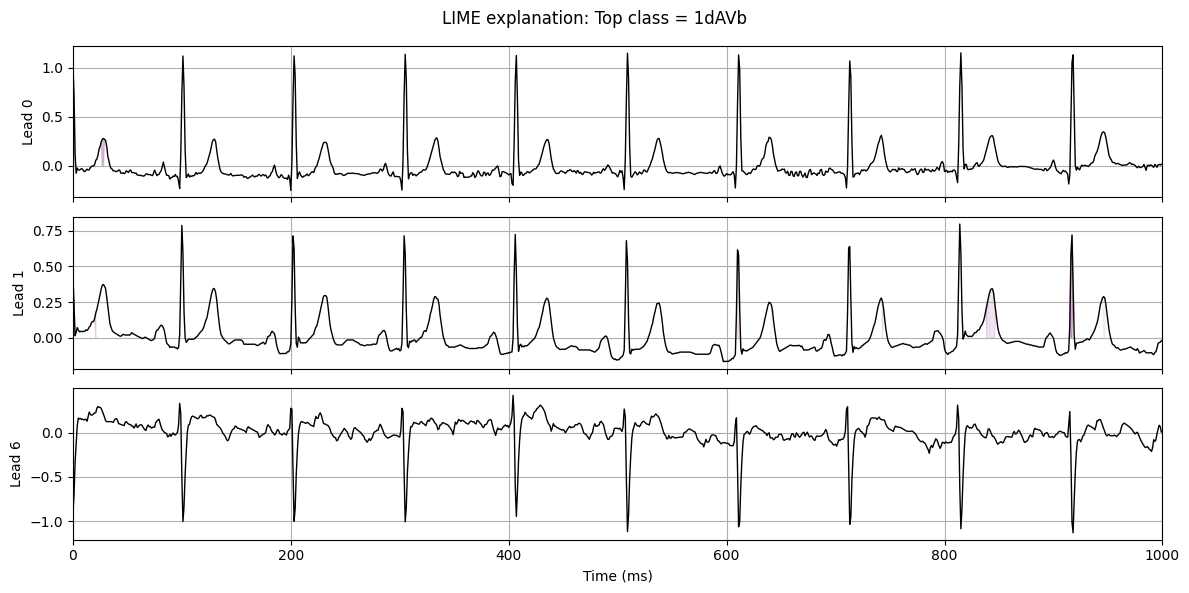

In [115]:
# Class labels as passed to model
class_names = label_encoder.classes_.tolist()

# Get one sample
example = data1.squeeze()  # Shape: (12, 1000)

# Plot leads I, II, V1 (indexes 0, 1, 6)
explain_and_plot_ecg_with_lime(
    ecg_input=example,
    model=model,
    x_train=X_train,
    class_names=class_names,
    leads_to_plot=[0, 1, 6]
)

1/1 [==============================] - 0s 12ms/step
(1, 1)
[2.8698126e-04 1.9397117e-04 1.3237685e-05 9.9827147e-01 1.5039531e-06
 1.2323086e-03 4.3023567e-07]
[['LBBB']]
Confidence score: 99.8271484375%
The ECG shows signs of Left Bundle Branch Block (LBBB).
Wide QRS complex (>120 ms) with a notched or slurred R wave in V5 and V6.
Missing Q wave on lateral leads (I, aVL, V5, V6).
157/157 [==============================] - 2s 12ms/step


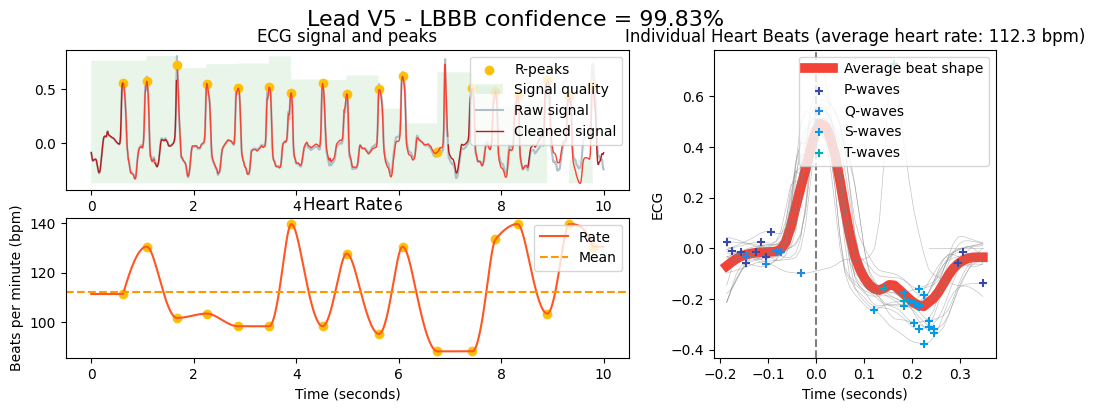

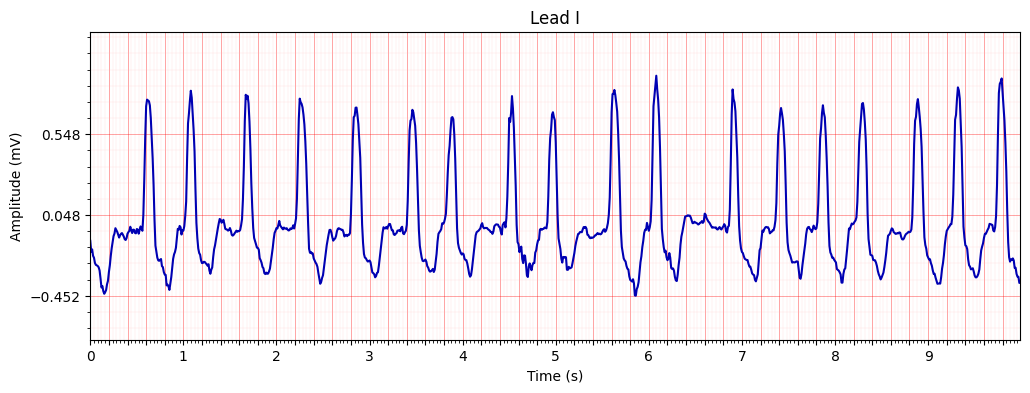

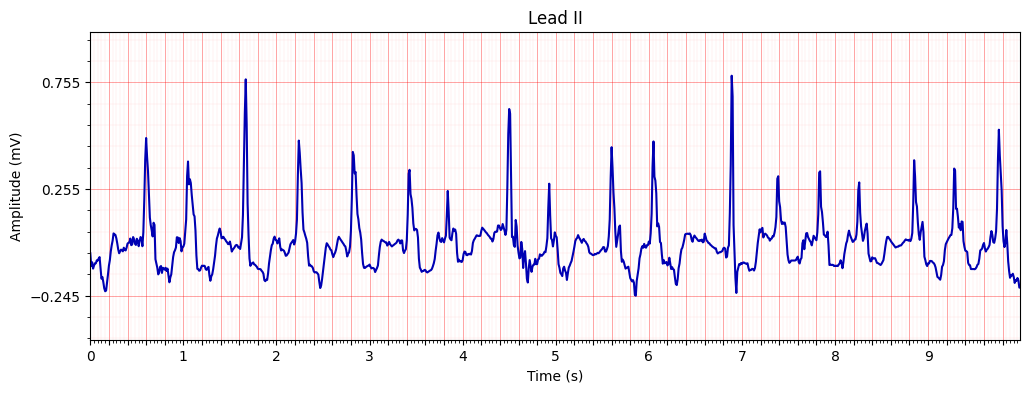

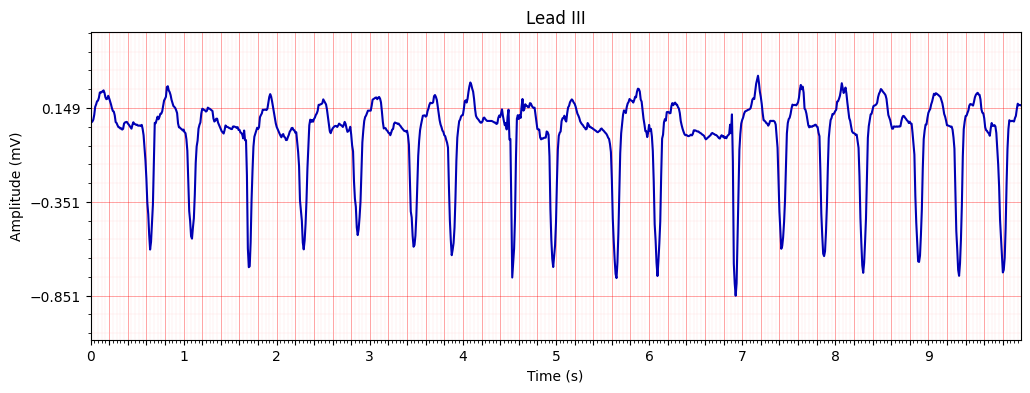

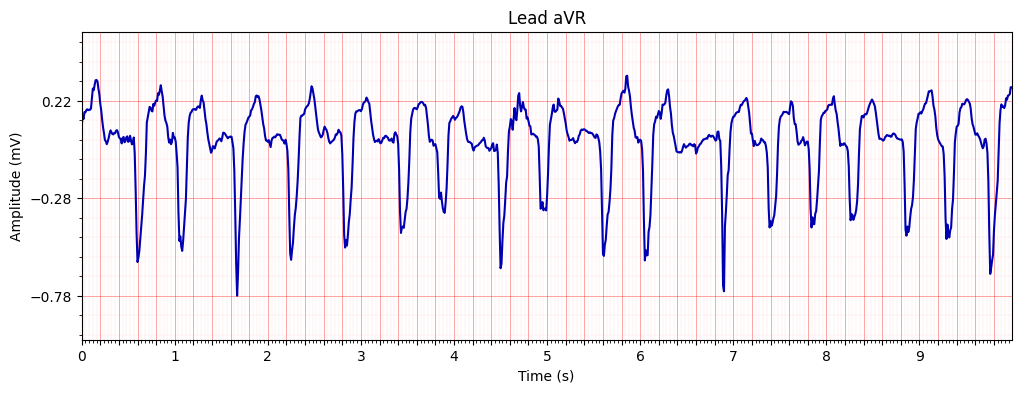

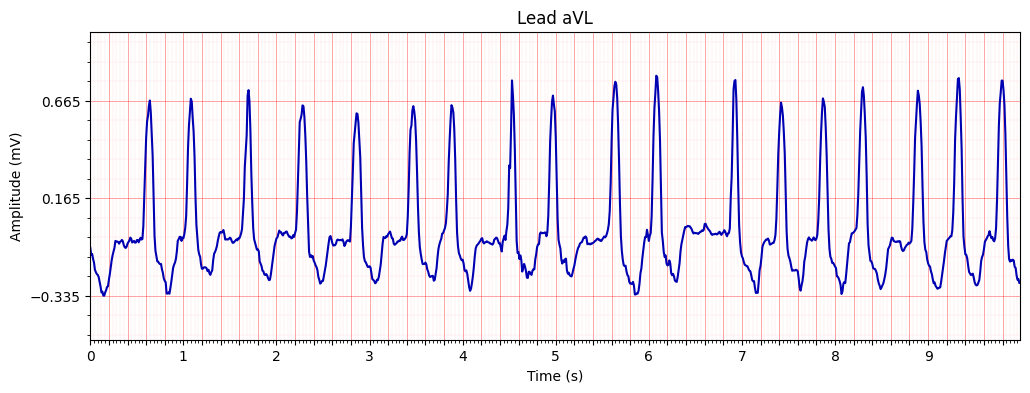

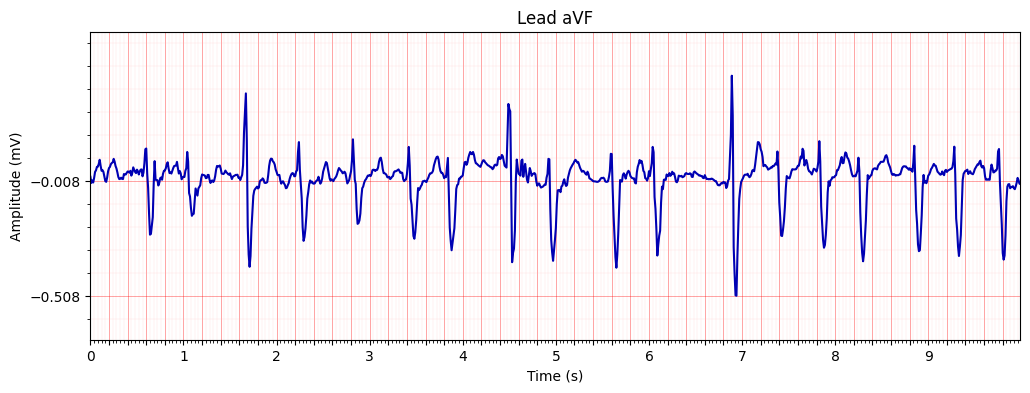

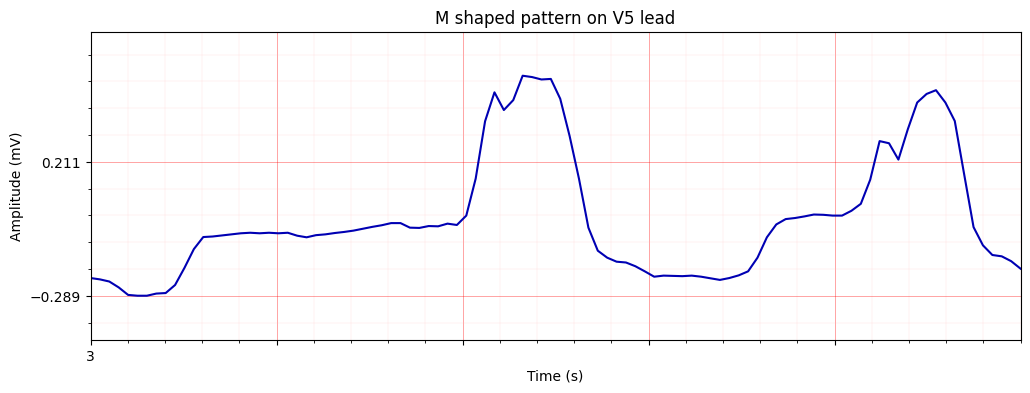

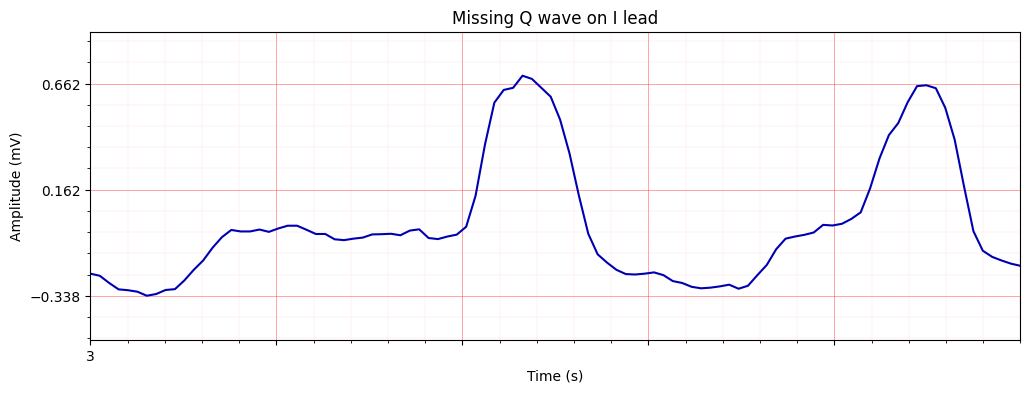

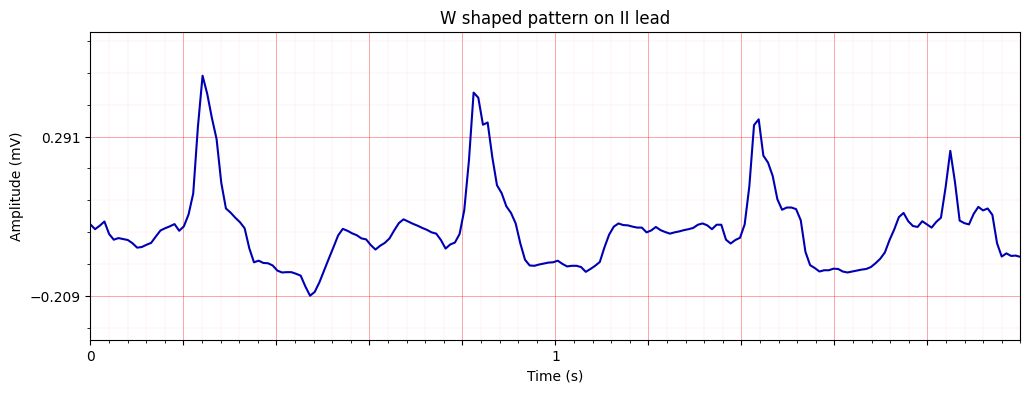

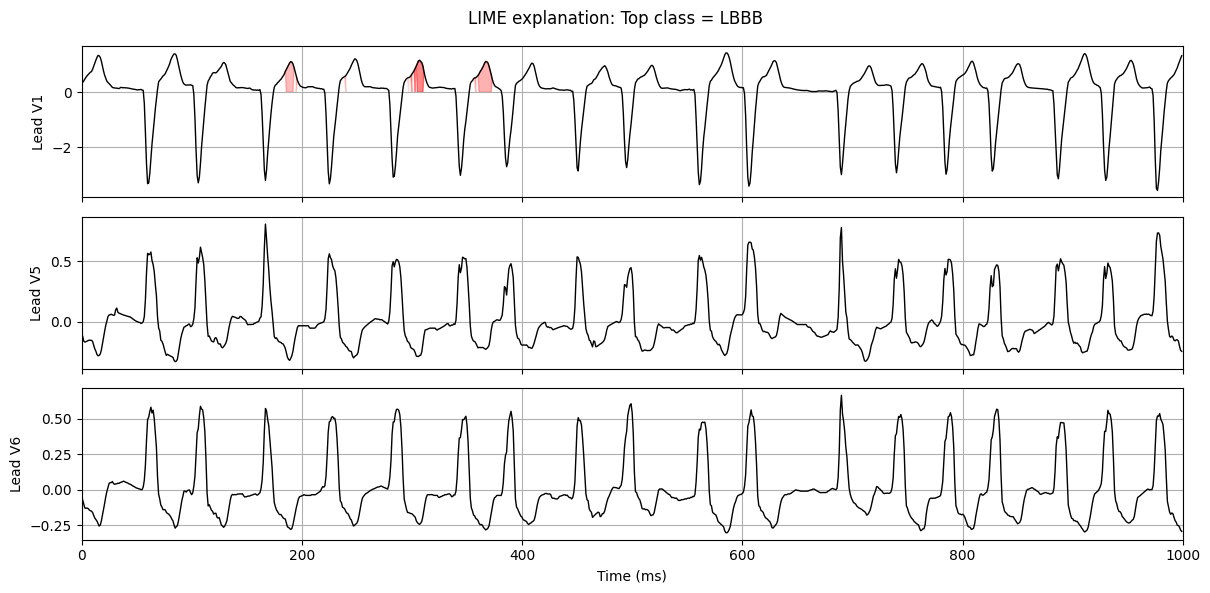

In [167]:
%matplotlib inline
# Single prediction with display
file = "C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation06\\validation06.npy"
ref_file = "C:\\Users\\mstew\\OneDrive\\Curtin Univeristy\\COMP6011\\Task 3\\validation\\validation\\validation01\\validation01.npy"
data1 = np.load(file)
data2 = np.load(ref_file)
data1_reshape  = data1.reshape(1, no_of_leads, 1000, 1)
y_val_single = model.predict(data1_reshape)

class_names = label_encoder.classes_.tolist()
predicted_classes, confidence = print_prediction_class(y_val_single, class_names)

print(predicted_classes)
print(f"Confidence score: {(confidence[0] * 100)[0]}%")
confidence_percentage = (confidence[0] * 100)[0]

if predicted_classes[0] == ['NORM']:
    print("The ECG is normal.")
    load_numpy_binary_and_plot_combined(file, sampling_rate=100, title="Combined 12-Lead ECG - Normal")
elif predicted_classes[0] == ['AFIB']:
    print("The ECG shows signs of Atrial Fibrillation (AFIB).")
    print("P-wave is absent, and the R-R intervals are irregularly irregular.")
    # Retrieve the ECG data from the file
    ecg_signal, info = nk.ecg_process(data1[1], sampling_rate=100)
    nk.ecg_plot(ecg_signal, info)
    fig = plt.gcf()
    fig.suptitle(f"Lead II - Atrial Fibrillation (AFIB) confidence = {confidence_percentage:.2f}%", fontsize=16)
    fig.set_size_inches(12, 4)
    # Extract R-peaks
    info = nk.ecg_findpeaks(ecg_signal['ECG_R_Peaks'], sampling_rate=100, show=True)
    # LIME explanation
    example = data1.squeeze()  # Shape: (12, 1000)
    explain_and_plot_ecg_with_lime(
        ecg_input=example,
        model=model,
        x_train=X_train,
        class_names=class_names,
        leads_to_plot=[7]
    )

elif predicted_classes[0] == ['AFLT']:
    print("The ECG shows signs of Atrial Flutter (AFLT).")
    print("Sawtooth pattern in the inferior leads (II, III, aVF) with regular R-R intervals.")
    # Retrieve the ECG data from the file
    load_numpy_binary_and_plot_separate(file, sampling_rate=100, lead_list=[1,2,5,6])
    # Plot a 1 second segment of lead II
    loaded_ecg_data = data1
    num_leads, num_samples = loaded_ecg_data.shape
    
    time = np.linspace(3, 4, 100, endpoint=False)
    print(loaded_ecg_data[1,:].shape)
    plot_ecg_with_grid(time, loaded_ecg_data[2, 300:400], 'Sawtooth Pattern on Lead III', sampling_rate=100)
    # make y axis logarithmic
    fig = plt.gcf()

    fig.set_size_inches(12, 12)
    plt.show()
    # LIME explanation
    
    example = data1.squeeze()  # Shape: (12, 1000)
    
    explain_and_plot_ecg_with_lime(
        ecg_input=example,
        model=model,
        x_train=X_train,
        class_names=class_names,
        leads_to_plot=[0,1]
    )

elif predicted_classes[0] == ['1dAVb']:
    print("The ECG shows signs of First-degree AV block (1dAVb).")
    print("Prolonged PR interval (>200 ms) with normal QRS complex.")
    # print lead II
    ecg_signal, info = nk.ecg_process(data1[1], sampling_rate=100)
    nk.ecg_plot(ecg_signal, info)
    fig = plt.gcf()
    fig.suptitle(f"Lead II - 1dAVb confidence = {confidence_percentage:.2f}%", fontsize=16)
    fig.set_size_inches(12, 4)
    print("Note the longer PR interval in the lead II ECG trace compared to normal.")
    ecg_signal, info = nk.ecg_process(data2[1], sampling_rate=100)
    nk.ecg_plot(ecg_signal, info)
    fig = plt.gcf()
    fig.suptitle("Lead II - Normal", fontsize=16)
    fig.set_size_inches(12, 4)
    # load_numpy_binary_and_plot_separate(file, sampling_rate=100)

    # LIME explanation
    
    example = data1.squeeze()  # Shape: (12, 1000)
    
    explain_and_plot_ecg_with_lime(
        ecg_input=example,
        model=model,
        x_train=X_train,
        class_names=class_names,
        leads_to_plot=[1]
    )
    

elif predicted_classes[0] == ['RBBB']:
    print("The ECG shows signs of Right Bundle Branch Block (RBBB).")
    print("Wide QRS complex (>120 ms) with an rSR' pattern in V1 and V2.")
    # Retrieve the ECG data from the file
    ecg_signal, info = nk.ecg_process(data1[6], sampling_rate=100)
    nk.ecg_plot(ecg_signal, info)
    fig = plt.gcf()
    fig.suptitle(f"Lead V1 - RBBB confidence = {confidence_percentage:.2f}%", fontsize=16)
    fig.set_size_inches(12, 4)
    load_numpy_binary_and_plot_separate(file, sampling_rate=100, lead_list=[0,4,6,7, 10, 11])
    print("Characteristic RSR' (M-shaped) pattern in V1 and V2 leads.")
    time = np.linspace(3, 4, 100, endpoint=False)
    loaded_ecg_data = data1
    plot_ecg_with_grid(time, loaded_ecg_data[7, 300:400], 'M shaped pattern on V2 lead', sampling_rate=100)
    # LIME explanation
    example = data1.squeeze()  # Shape: (12, 1000)
    explain_and_plot_ecg_with_lime(
        ecg_input=example,
        model=model,
        x_train=X_train,
        class_names=class_names,
        leads_to_plot=[6,7]
    )

elif predicted_classes[0] == ['LBBB']:
    print("The ECG shows signs of Left Bundle Branch Block (LBBB).")
    print("Wide QRS complex (>120 ms) with a notched or slurred R wave in V5 and V6.")
    print("Missing Q wave on lateral leads (I, aVL, V5, V6).")
    # Retrieve the ECG data from the file
    ecg_signal, info = nk.ecg_process(data1[10], sampling_rate=100)
    nk.ecg_plot(ecg_signal, info)
    fig = plt.gcf()
    fig.suptitle(f"Lead V5 - LBBB confidence = {confidence_percentage:.2f}%", fontsize=16)
    fig.set_size_inches(12, 4)
    load_numpy_binary_and_plot_separate(file, sampling_rate=100, lead_list=[0,1,2,3, 4, 5])
    time = np.linspace(3, 4, 100)
    loaded_ecg_data = data1
    plot_ecg_with_grid(time, loaded_ecg_data[10, 300:400], 'M shaped pattern on V5 lead', sampling_rate=100)
    plot_ecg_with_grid(time, loaded_ecg_data[0, 300:400], 'Missing Q wave on I lead', sampling_rate=100)
    plot_ecg_with_grid(np.linspace(0,2, 200), loaded_ecg_data[1, 200:400], 'W shaped pattern on II lead', sampling_rate=100)
    # LIME explanation
    example = data1.squeeze()  # Shape: (12, 1000)
    explain_and_plot_ecg_with_lime(
        ecg_input=example,
        model=model,
        x_train=X_train,
        class_names=class_names,
        leads_to_plot=[6,10, 11]
    )
else:
    print("The ECG shows signs of an unknown condition.")
    print("Predicted classes:", predicted_classes[0])
    load_numpy_binary_and_plot_combined(file, sampling_rate=100, title="Combined 12-Lead ECG - Unknown Condition")





In [107]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lime_ecg_highlight_normalized(ecg_signal, importance_scores, lead_names=None, percentile=95):
    """
    Plot ECG with normalized importance scores (from LIME) to highlight relevant areas.

    - ecg_signal: (12, 1000)
    - importance_scores: (12, 1000)
    - percentile: highlights top X% of important regions
    """
    import matplotlib.pyplot as plt

    if lead_names is None:
        lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    fig, axs = plt.subplots(12, 1, figsize=(15, 20), sharex=True)
    time = np.arange(ecg_signal.shape[1])

    for i in range(12):
        axs[i].plot(time, ecg_signal[i], label=lead_names[i], color='black', linewidth=1)

        # Normalize importance for this lead
        imp = importance_scores[i]
        imp = np.abs(imp)
        if np.max(imp) != 0:
            imp = imp / np.max(imp)

        # Create mask for top X% important points
        threshold = np.percentile(imp, percentile)
        important_mask = imp >= threshold

        # Fill transparent highlight
        axs[i].fill_between(
            time,
            np.min(ecg_signal[i]) - 0.1,
            np.max(ecg_signal[i]) + 0.1,
            where=important_mask,
            color='purple',
            alpha=0.2,
            interpolate=True
        )

        axs[i].set_ylabel(lead_names[i], rotation=0, labelpad=25)
        axs[i].grid(True)

    axs[-1].set_xlabel("Time (ms)")
    plt.tight_layout()
    plt.suptitle("ECG with LIME-based Highlights (Top 5% Important Segments)", y=1.02, fontsize=16)
    plt.show()


from lime import lime_tabular

def explain_ecg_with_lime(model, ecg_input, class_names, sample_index=None):
    """
    Use LIME to explain an ECG sample. Assumes input shape (1, 12, 1000, 1).
    """
    # Flatten sample to 1D
    sample = ecg_input[0].squeeze().flatten()  # shape: (12*1000,) = (12000,)

    def predict_fn(x):
        # Reshape LIME's flat input (N, 12000) → (N, 12, 1000, 1)
        reshaped = x.reshape((-1, 12, 1000, 1))
        return model.predict(reshaped)

    explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.zeros((1, 12000)),  # dummy to set shape
        mode='classification',
        feature_names=[f"f{i}" for i in range(12000)],
        class_names=class_names,
        discretize_continuous=False
    )

    # Predict class if not given
    if sample_index is None:
        pred = model.predict(ecg_input)
        sample_index = np.argmax(pred)

    explanation = explainer.explain_instance(
        data_row=sample,
        predict_fn=predict_fn,
        labels=(sample_index,)
    )

    # Map importance back to shape (12, 1000)
    weights = dict(explanation.as_map()[sample_index])
    importance_flat = np.zeros(12000)
    for i, weight in weights.items():
        importance_flat[i] = weight
    importance = importance_flat.reshape((12, 1000))

    return importance

157/157 [==============================] - 2s 13ms/step
Intercept 6.0766411114474136e-05
Prediction_local [0.90745049]
Right: 0.98921764


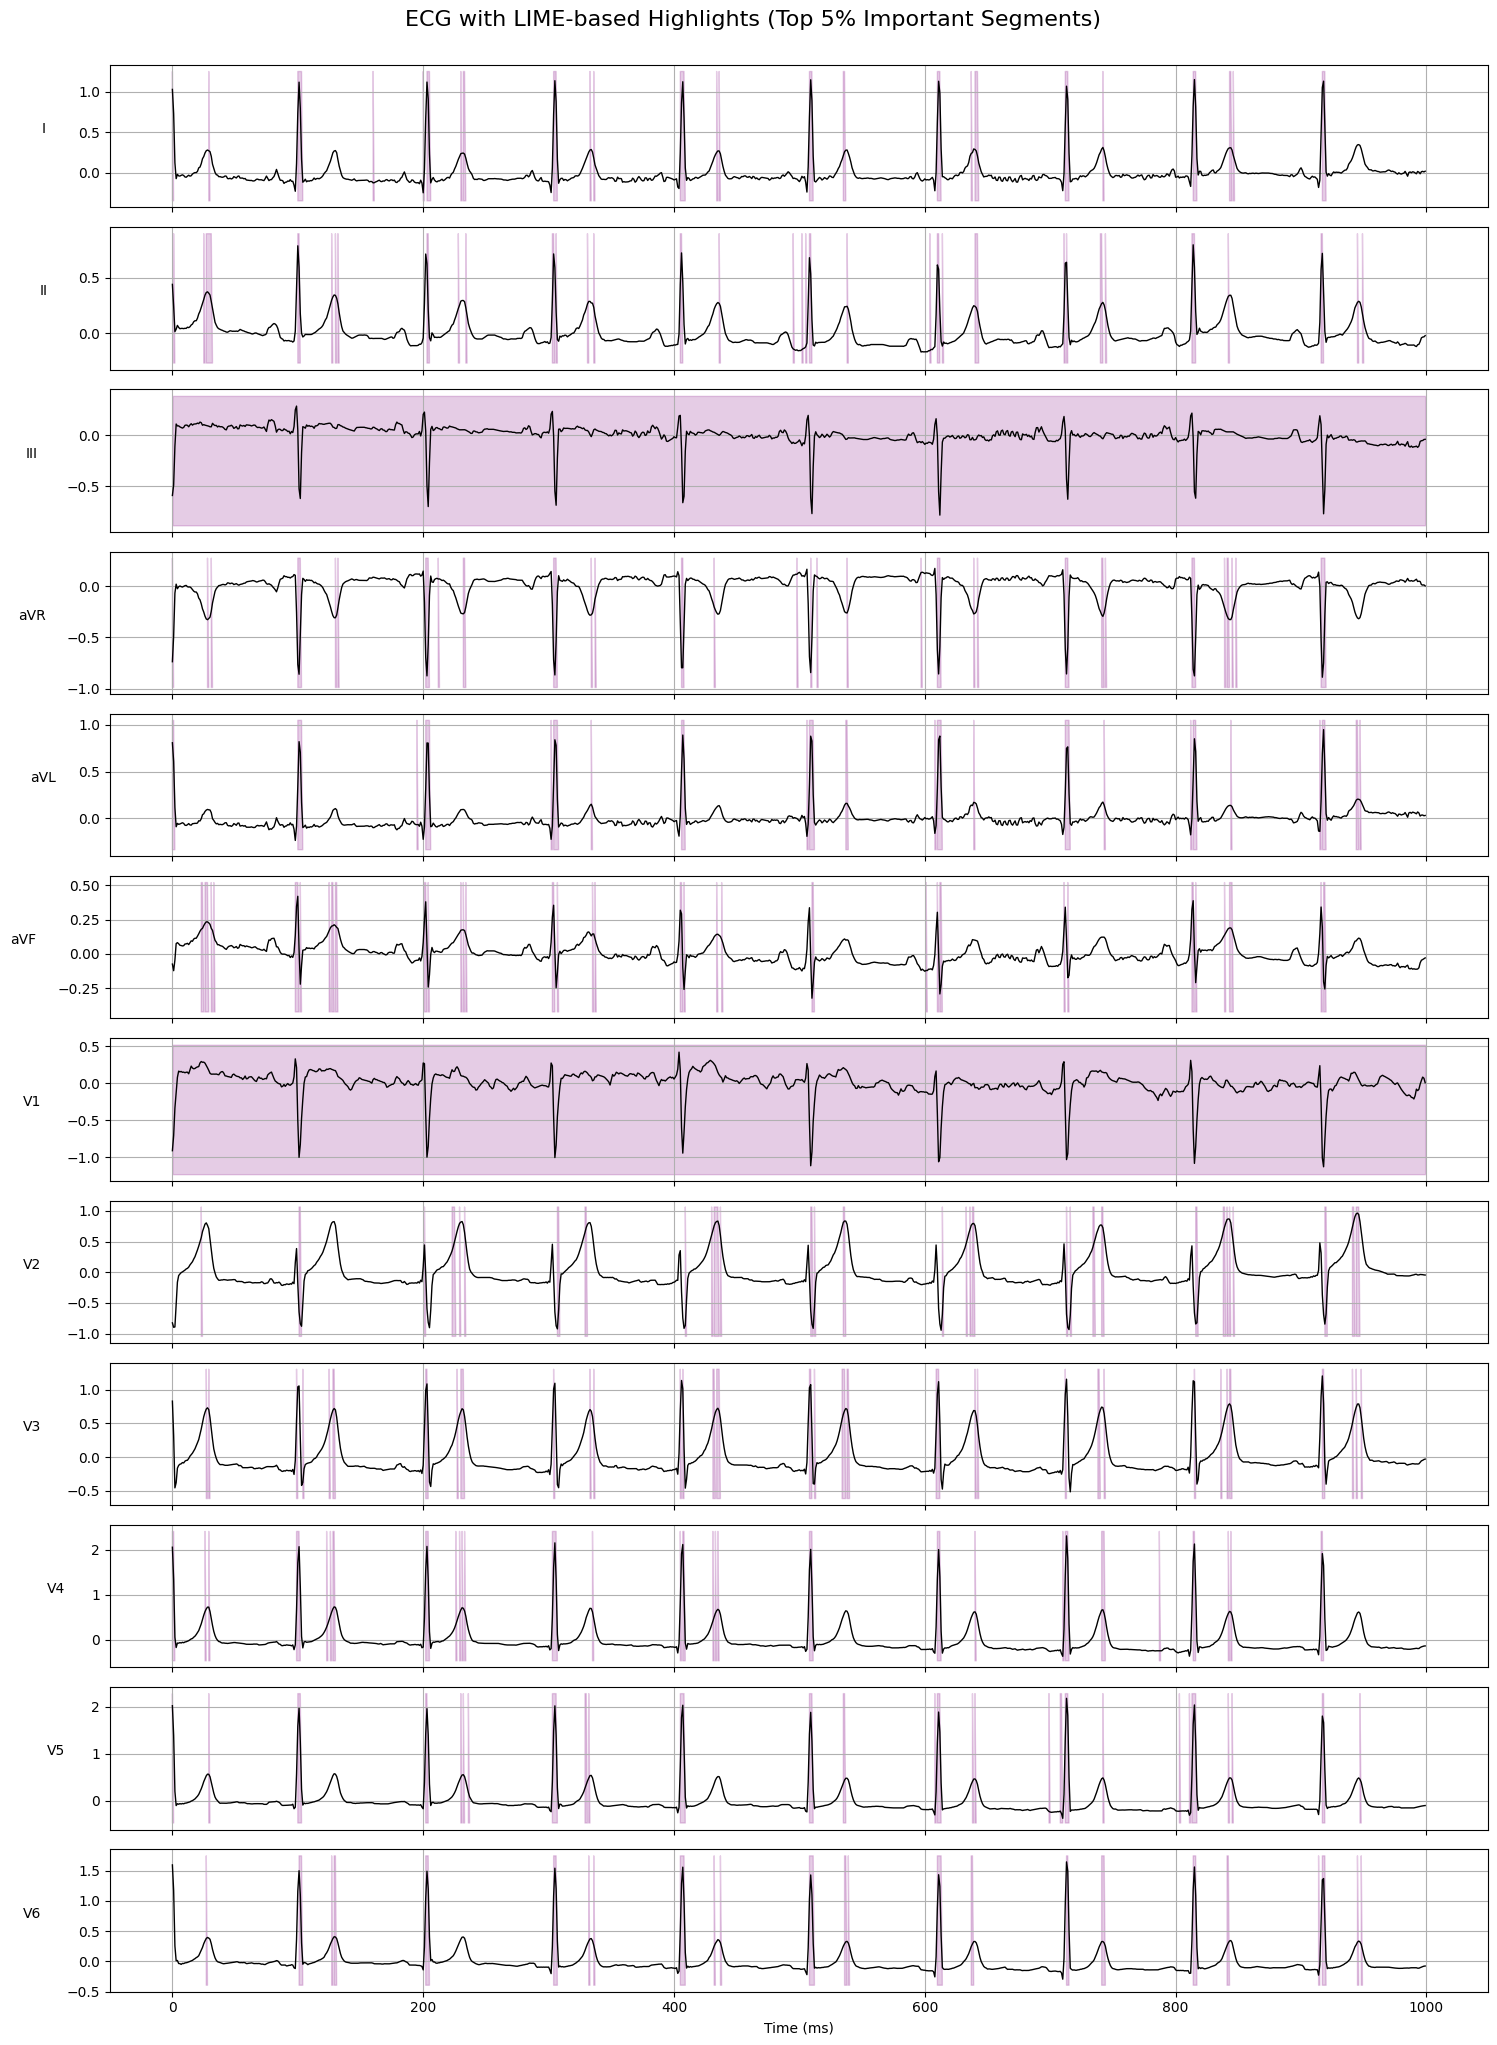

In [ ]:
def predict_ecg_proba(input_batch_flattened):
    """
    Takes flattened LIME input, reshapes to (N, 12, 1000, 1) and returns softmax probabilities.
    """
    reshaped = input_batch_flattened.reshape(-1, 12, 1000, 1)
    return model.predict(reshaped)

from lime import lime_tabular

# Load a single example (shape: (12, 1000))
example = data1_reshape.squeeze()  # remove batch and channel

# Flatten for LIME
example_flat = example.reshape(-1)

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.reshape(X_train.shape[0], -1),
    feature_names=[f"{lead}_{t}" for lead in range(12) for t in range(1000)],
    class_names=class_names,
    mode='classification',
    discretize_continuous=False,
    verbose=True
)

explanation = explainer.explain_instance(
    example_flat,
    predict_ecg_proba,
    num_features=1000,
    top_labels=1
)

# Get importance for top class
label = explanation.top_labels[0]
weights = dict(explanation.as_list(label=label))

# Rebuild (12, 1000) importance map
importance = np.zeros((12, 1000))
for i in range(12):
    for t in range(1000):
        key = f"{i}_{t}"
        if key in weights:
            importance[i, t] = weights[key]

plot_lime_ecg_highlight_normalized(example, importance)

['1dAVb', 'AFIB', 'AFLT', 'LBBB', 'NORM', 'OTHER', 'RBBB']
157/157 [==============================] - 2s 13ms/step
(12, 1000)


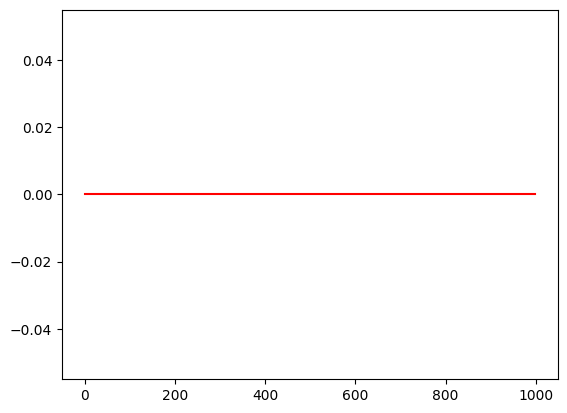

In [110]:
class_names = label_encoder.classes_.tolist()
print(class_names)
# Assume: ecg_input.shape = (1, 12, 1000, 1)
importance = explain_ecg_with_lime(model, data1_reshape, class_names)
print(importance.shape)

plt.plot(importance[2], label='Importance for Lead V1', color='red')
# Now plot the result
# plot_lime_ecg_highlight(data1_reshape[0].squeeze(), importance)